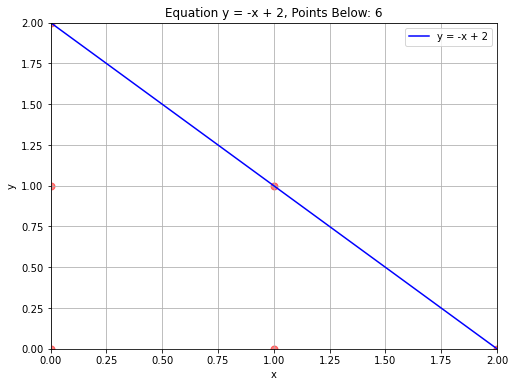

Number of points below the line: 6


In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

# Define the equation parameters
N = 2

# Generate x and y values for points below the line
x_below = []
y_below = []

for x in range(N + 1):
    for y in range(N + 1):
        if y <= -x + N:
            x_below.append(x)
            y_below.append(y)

num_points_below = len(x_below)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot([0, N], [N, 0], label=f'y = -x + {N}', color='blue')  # Plot the line
plt.scatter(x_below, y_below, color='red', s=50, alpha=0.5)   # Plot points below the line

plt.xlim(0, N)
plt.ylim(0, N)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Equation y = -x + {N}, Points Below: {num_points_below}')
plt.legend()
plt.grid(True)
plt.show()

print(f'Number of points below the line: {num_points_below}')


In [2]:
import pandas as pd

x1 = np.array([[1.0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]])

x2 = np.array([[0, 1.0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]])

x3 = np.array([[0, 0, 1.0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]])
x4 = np.array([[0, 0, 0, 1.0],
               [0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]])

x5 = np.array([[0, 0, 0, 0],
               [1.0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]])

x6 = np.array([[0, 0, 0, 0],
               [0, 1.0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]])

auxm=[x1,x2,x3,x4,x5,x6]
pairs=[(0,0),(0,1),(0,2),(1,1),(1,0),(2,0)]

data = {'pair': pairs,'initial auxiliary matrix': auxm}
df = pd.DataFrame(data)
print("\n Auxillary matrices with their indices :")
df



 Auxillary matrices with their indices :


,pair,initial auxiliary matrix
0,"(0, 0)","[[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
1,"(0, 1)","[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
2,"(0, 2)","[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0], [..."
3,"(1, 1)","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0], [..."
4,"(1, 0)","[[0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [..."
5,"(2, 0)","[[0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [..."


In [3]:
H=np.array([[0, 0, 0, 0],
               [0, 16.0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]])
p=np.array([[0, 0, 0, 0],
               [0, 1.0, 0, 0],
               [0, 65.0, 0, 0],
               [0, 0, 0, 0]])
V1=np.array([[0, 0, 0, 0],
               [0, 14.0, 0, 0],
               [0, 0, 0, 0],
               [67.0, 0, 0, 0]])
V2=np.array([[0, 45.0, 0, 0],
               [0, 1.0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 89.0]])

lamda=[1,2]
gamma=[1,2]
kb= 1.380649*(10**(-23)) #J.K^-1
temp=2.15 #K
beta=1/(kb*temp)
h_bar=1.054571817*(10**(-34))

C1=2*lamda[0]/beta*(h_bar**2)
C11=lamda[0]*gamma[0]/h_bar
C2=2*lamda[1]/beta*(h_bar**2)
C22=lamda[1]*gamma[1]/h_bar


In [4]:
filtered_pairs = df['pair'].tolist()

def getPair(index):
    if index >= 0 and index < len(df):
        return df.loc[index, 'pair']
    elif index >= len(df):
        error = 0
        return 'error'
    elif index < 0:
        return 'error'
    else:
        return 'error'


In [5]:
getPair(2)

(0, 2)

In [6]:
def getIndex(pair):
    for index, row in df.iterrows():
        if all(x == y for x, y in zip(pair, row['pair'])):
            if sum(pair) >= 0 and sum(pair) <= 2:
                return index
    return -1

In [7]:
getIndex((0,2))

2

In [8]:
def pairfunction(pair1):
    index = getIndex(pair1)
    if index != -1:
        return df.loc[index, 'initial auxiliary matrix']
    else:
        return np.zeros((4, 4))

In [9]:
pairfunction((0,2))

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
def indexfunction(index):
    if 0 <= index < len(df):
        return df.loc[index, 'initial auxiliary matrix']
    else:
        return "error"

In [11]:
indexfunction(2)

array([[0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
pair=(0,1)
n1=pair[0]
n2=pair[1]
    
#HEOM equation
#equation part 1

a1=np.dot(V1, pairfunction((n1-1, n2)))
print(a1)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [21]:
pairtest=(0,0)
n1=pair[0]
n2=pair[1]

x1=pairfunction((n1,n2))
x2=pairfunction((n1+1,n2))
x3=pairfunction((n1,n2+1))
x4=pairfunction((n1-1, n2))
x5=pairfunction((n1,n2-1))

def dpdt(x1,x2,x3,x4,x5):
    n1=pair[0]
    n2=pair[1]
    
    #HEOM equation
    #equation part 1
    a1=-1*(1j*(np.dot(H,p)-np.dot(p,H)) + n1*gamma[0] + n2*gamma[1] )*x1
    a2=(1j*(np.dot(V1,x2)- np.dot(x2,V1)))
    a3=(1j*(np.dot(V2,x3) - np.dot(x3,V2)))
    a=a1+a2+a3
    
    #part 2
    b1=(C1*(np.dot(V1, x4) - np.dot(x4, V1)))
    b2=-1j*(C11*(np.dot(V1, x4) + np.dot(x4, V1)))
    b=1j*(b1+b2)
    
    #part 3
    c1=(C2*(np.dot(V2,x5) - np.dot(x5,V2)))
    c2=-1j*(C22*(np.dot(V2,x5 + np.dot(x5,V2))))
    c=1j*(c1+c2)
    
    #the HEOM eqn = part 1 + part 2 + part 3 = a+b+c
    res=a+b+c
    
    return res #res.flatten().reshape(-1,1)

print(dpdt(x1,x2,x3,x4,x5))


[[ 0.-6.70000000e+01j -2.-5.94219048e-89j  0.+0.00000000e+00j
   0.+0.00000000e+00j]
 [ 0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j
   0.+0.00000000e+00j]
 [ 0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j
   0.+0.00000000e+00j]
 [ 0.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j
   0.+6.70000000e+01j]]


In [24]:
def RK4(pair, h, dpdt):
    n1=pair[0]
    n2=pair[1]
    x1=pairfunction((n1,n2))
    x2=pairfunction((n1+1,n2))
    x3=pairfunction((n1,n2+1))
    x4=pairfunction((n1-1, n2))
    x5=pairfunction((n1,n2-1))
    
    k1 = h * dpdt(x1, x2, x3,x4,x5)
    k2 = h * dpdt(x1 + k1/2, x2 + k1/2, x3 + k1/2,x4 + k1/2,x5 + k1/2)
    k3 = h * dpdt(x1 + k2/2, x2 + k2/2, x3 + k2/2,x4 + k2/2,x5 + k2/2)
    k4 = h * dpdt(x1 + k3, x2 + k3, x3 + k3,x4 + k3,x5 + k3)
    
    x1_new = x1 + k1/6 + k2/3 + k3/3 + k4/6
    x2_new = x2 + k1/6 + k2/3 + k3/3 + k4/6
    x3_new = x3 + k1/6 + k2/3 + k3/3 + k4/6
    x4_new = x4 + k1/6 + k2/3 + k3/3 + k4/6
    x5_new = x5 + k1/6 + k2/3 + k3/3 + k4/6
    
    return x1_new, x2_new, x3_new, x4_new, x5_new

In [30]:
t_i = 0
t_f = 20
nsteps = 500

h = (t_f - t_i) / nsteps
# for (0,0)
x1_list_00=[]
x2_list_00=[]
x3_list_00=[]
x4_list_00=[]
x5_list_00=[]
# Example usage
for step in range(1, nsteps + 1):
    x1_new, x2_new, x3_new,x4_new,x5_new= RK4((0,0), h, dpdt)
    x1_list_00.append(x1_new)
    x2_list_00.append(x2_new)
    x3_list_00.append(x3_new)
    x4_list_00.append(x4_new)
    x5_list_00.append(x5_new)


In [31]:
# for (0,1)
x1_list_01=[]
x2_list_01=[]
x3_list_01=[]
x4_list_01=[]
x5_list_01=[]
# Example usage
for step in range(1, nsteps + 1):
    x1_new, x2_new, x3_new,x4_new,x5_new= RK4((0,0), h, dpdt)
    x1_list_01.append(x1_new)
    x2_list_01.append(x2_new)
    x3_list_01.append(x3_new)
    x4_list_01.append(x4_new)
    x5_list_01.append(x5_new)

In [32]:
# for (0,2)
x1_list_02=[]
x2_list_02=[]
x3_list_02=[]
x4_list_02=[]
x5_list_02=[]
# Example usage
for step in range(1, nsteps + 1):
    x1_new, x2_new, x3_new,x4_new,x5_new= RK4((0,0), h, dpdt)
    x1_list_02.append(x1_new)
    x2_list_02.append(x2_new)
    x3_list_02.append(x3_new)
    x4_list_02.append(x4_new)
    x5_list_02.append(x5_new)

In [33]:
# for (1,1)
x1_list_11=[]
x2_list_11=[]
x3_list_11=[]
x4_list_11=[]
x5_list_11=[]
# Example usage
for step in range(1, nsteps + 1):
    x1_new, x2_new, x3_new,x4_new,x5_new= RK4((0,0), h, dpdt)
    x1_list_11.append(x1_new)
    x2_list_11.append(x2_new)
    x3_list_11.append(x3_new)
    x4_list_11.append(x4_new)
    x5_list_11.append(x5_new)

In [34]:
# for (1,0)
x1_list_10=[]
x2_list_10=[]
x3_list_10=[]
x4_list_10=[]
x5_list_10=[]
# Example usage
for step in range(1, nsteps + 1):
    x1_new, x2_new, x3_new,x4_new,x5_new= RK4((0,0), h, dpdt)
    x1_list_10.append(x1_new)
    x2_list_10.append(x2_new)
    x3_list_10.append(x3_new)
    x4_list_10.append(x4_new)
    x5_list_10.append(x5_new)

In [35]:
# for (2,0)
x1_list_20=[]
x2_list_20=[]
x3_list_20=[]
x4_list_20=[]
x5_list_20=[]
# Example usage
for step in range(1, nsteps + 1):
    x1_new, x2_new, x3_new,x4_new,x5_new= RK4((0,0), h, dpdt)
    x1_list_20.append(x1_new)
    x2_list_20.append(x2_new)
    x3_list_20.append(x3_new)
    x4_list_20.append(x4_new)
    x5_list_20.append(x5_new)

In [38]:
x1list=[x1_list_00,x1_list_01,x1_list_02,x1_list_11,x1_list_10,x1_list_10]
matrix_column_vector = np.array(x1list, dtype=object).reshape(-1, 1)
print(matrix_column_vector)

[[list([])]
 [list([array([[-1.50095801e+067+7.42584350e+100j,
           4.34214342e+067+1.35725422e+103j,
           0.00000000e+000+0.00000000e+000j,
           0.00000000e+000+0.00000000e+000j],
         [-1.95777132e+066+7.42584350e+099j,
          -1.23992183e+067+5.19809045e+101j,
           0.00000000e+000+0.00000000e+000j,
           0.00000000e+000+0.00000000e+000j],
         [ 0.00000000e+000+0.00000000e+000j,
           0.00000000e+000+0.00000000e+000j,
           0.00000000e+000+0.00000000e+000j,
           0.00000000e+000+0.00000000e+000j],
         [-1.54456090e+102+5.74311069e+102j,
          -2.11249073e+104+7.72045015e+104j,
           0.00000000e+000+0.00000000e+000j,
           0.00000000e+000+0.00000000e+000j]]), array([[-1.50095801e+067+7.42584350e+100j,
           4.34214342e+067+1.35725422e+103j,
           0.00000000e+000+0.00000000e+000j,
           0.00000000e+000+0.00000000e+000j],
         [-1.95777132e+066+7.42584350e+099j,
          -1.23992183e+067+5.198